<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Main-charactersitics-of-molecular-simulations" data-toc-modified-id="Main-charactersitics-of-molecular-simulations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Main charactersitics of molecular simulations</a></span></li><li><span><a href="#Simulation-of-liquids" data-toc-modified-id="Simulation-of-liquids-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulation of liquids</a></span></li></ul></div>

# Main charactersitics of molecular simulations

* The Molecular Mechanics Force Field: https://en.wikipedia.org/wiki/Force_field_(chemistry)
* Long-range interactions: https://en.wikibooks.org/wiki/Molecular_Simulation/Treatment_of_Long_Range_Forces 
* The equations of motion: integrators https://en.wikipedia.org/wiki/Molecular_dynamics#Molecular_dynamics_algorithms 
* Thermostats
* Barostats


# Simulation of liquids

Make sure you can successfully run a simulation of a box of waters. Watch the video if you need to.
The files water.out, water-processed.pdb, and water.dcd are created after you run the simulation and they will be in the folder that you have indicated. These files will be easier to read if you select the same folder as where you have this notebook, if not, you may just need to copy them to the current folder.

It is important that your simulation paramaters include
* Write your results every 10 steps
* At least 50 ps of simulation, that's 50000 steps of 1fs timestep.
* Your output should include temperature, KE, PE and Total E.

In [4]:
import pandas as pd

data = pd.read_csv("water_box/water.out",sep="\t")
display(data)
#using iloc I can select the 3rd column
myPE = data.iloc[:,2]
myKE = data.iloc[:,3]
myT = data.iloc[:,5]
myDens = data.iloc[:,7]

,"#""Step""",Time (ps),Potential Energy (kJ/mole),Kinetic Energy (kJ/mole),Total Energy (kJ/mole),Temperature (K),Box Volume (nm^3),Density (g/mL)
0,10,0.11,-15852.863671,1946.993188,-13905.870483,176.001094,9.353182,0.946724
1,20,0.12,-15597.068406,1758.497530,-13838.570876,158.961773,9.353182,0.946724
2,30,0.13,-15719.284506,1757.676208,-13961.608297,158.887529,9.338105,0.948253
3,40,0.14,-15856.482367,2010.354291,-13846.128076,181.728707,9.338105,0.948253
4,50,0.15,-15583.168041,1850.758898,-13732.409143,167.301865,9.268756,0.955348
...,...,...,...,...,...,...,...,...
4995,49960,50.06,-14399.581223,3315.126929,-11084.454295,299.675402,8.586259,1.031285
4996,49970,50.07,-14448.337692,3320.166359,-11128.171332,300.130949,8.586259,1.031285
4997,49980,50.08,-14448.884486,3343.899860,-11104.984626,302.276371,8.556562,1.034865
4998,49990,50.09,-14419.638159,3334.846615,-11084.791544,301.457990,8.648801,1.023828


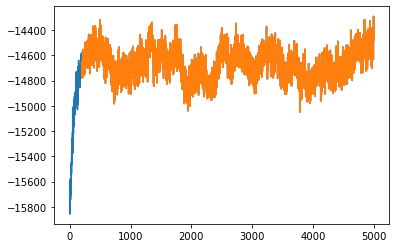

In [15]:
import matplotlib.pyplot as plt

plt.plot(myPE)
plt.plot(myPE[200:])

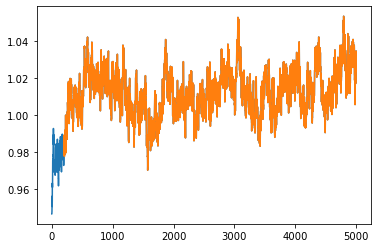

In [5]:
plt.plot(myDens)
plt.plot(myDens[200:])

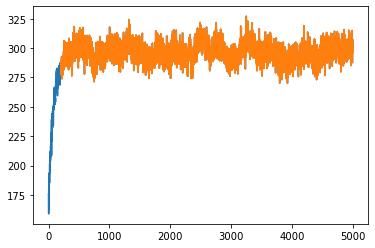

In [3]:
import matplotlib.pyplot as plt

plt.plot(myT)
plt.plot(myT[200:])

Your turn
* In a similar fashion as above, plot the kinetic energy, the total energy of the system, and the temperature
* Why is the kinetic energy always positive and the potential always negative?
* At what portion of the simulation are your properties stable enough that allow you to start "measuring"?

The heat capacity can also be computed from the simulation using the total energy average of squares.

$$
<E>^2 - <E^2>
$$

* Build a loop to calculate the heat capacity (we won't be discussing its units for now)

In [68]:
totE = data.iloc[:,4]

aveE = 0
aveE2 = 0
for e in totE:
    e = float(e)
    aveE += e
    aveE2 += e**2

totSteps = len(totE)

averageE_squared = (aveE/totSteps)**2
averageSquared_E = (aveE2/totSteps)

print(averageSquared_E-averageE_squared)

70213.67867276073


* You can use MDanalysis to read the trajectory. Here below is an example where we monitor the distance between two oxygens in two different waters. How can you explain the big jumps in distance?

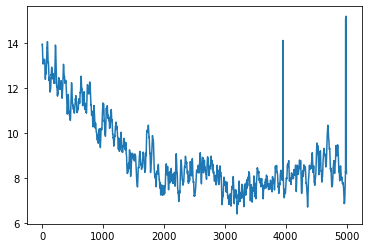

In [58]:
import MDAnalysis as mda
import numpy as np

u = mda.Universe('water_box/water-processed.pdb','water_box/water.dcd')

dist = []
for snap in u.trajectory:
    #selecting the central atom
    myO1 = u.select_atoms("name O and segid 2").center_of_geometry()
    myO2 = u.select_atoms("name O and resid 2 and segid 3").center_of_geometry()
    #selecting
    myDist = np.linalg.norm(myO1-myO2)
    dist.append(myDist)

plt.plot(dist);

* Fun exercise: Using raw python (no extra modules) open the initial pdb file, read line by line, and find the water that is closest to first water and follow its distance throughout the trajectory.